In [1]:
# Rio de Janeiro, 23 de Setembro de 2021
# Patents with foreign application
# Citation to foreign patents (total count)
# Applications (date)


## Patents with foreign application
- Information about an earlier patent filing in a foreign country which gives the claim priority 


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [3]:
# priority='data/foreign_priority.tsv.zip'
# df=pd.read_csv(priority, compression='zip', sep='\t')

# dst='data/foreign_priority.parquet.gz'
# df=df[['patent_id','date', 'country_transformed']]
# df = df.rename(columns={'date': 'f_priority_date'})
# #df.to_parquet(dst, compression='gzip')
# df.memory_usage()

## Citation to foreign patents

In [4]:
f_citation='data/foreigncitation.tsv.zip'
df=pd.read_csv(f_citation, compression='zip', sep='\t')
df.head()    

,uuid,patent_id,date,number,country,category,sequence
0,00000kn29m6rw14dilp4huhqa,9872910,2013-04-01,2013-512894,JP,cited by applicant,4
1,00000mb3si9yta1mr1mzzf7t3,7580255,2001-05-01,1 104 150,EP,cited by other,0
2,00007x6v2g3mhkq0vq9o2k3g3,10221436,2007-12-01,WO-2007138178,WO,cited by applicant,84
3,00009vc2dthuhusv4ftd964dp,5928533,1990-07-01,2641718,FR,NaN,1
4,0000clmhnekrrt61zwmx9n0s1,7223854,1993-04-01,WO 93/07898,WO,cited by other,6


In [5]:
# cria uma lista de paises por patent_id
# df.groupby(['patent_id'])['country'].apply(list) 

In [6]:
# paises com mais citacoes
df.groupby('country').count()['uuid'].sort_values(ascending=False).head(15)

country
JP            8346421
WO            7968298
EP            4179673
DE            1834930
GB            1346828
CN            1041043
KR             676674
FR             581537
CA             301150
TW             169681
SU             146327
JPX            125730
AU             120729
EPX            105406
RU              97030
Name: uuid, dtype: int64

In [7]:
# exportamos apenas a contagem
# dst='data/foreigncitation.parquet.gz'
# df.groupby('patent_id').count()['uuid'].to_frame().to_parquet(dst, compression='gzip')
# df.memory_usage()

In [8]:
# distribution of foreign cited patents per year
df['date'] = pd.to_datetime(df['date'].astype(str), errors='coerce')

df['year']=df.date.dt.year
df['decade']=df.date.dt.year//10*10
df['decade'] =df['decade'].apply(lambda x: int(x) if str(x) != 'nan' else np.nan)
decades=list(df.decade.unique())

In [9]:
df[df['year']>2019]


,uuid,patent_id,date,number,country,category,sequence,year,decade
2756072,3kqloun8z4na55mqvl6k2xyfd,5537533,2094-04-01,PCT/US94/04326,WO,NaN,0,2094.0,2090.0
5118198,6n2mau1fobf3vnki5p3l5xf52,5400007,2089-12-01,0347029,EP,NaN,1,2089.0,2080.0
5358281,6yanei21atwp7xogyt8x5hzlj,8206476,2035-02-01,102005008667,DE,cited by other,1,2035.0,2030.0
6362369,89827qe6vqfeb9ruc4dcvbto0,5482714,2087-05-01,222580,EP,NaN,0,2087.0,2080.0
6398005,8awk7aqmt8y3gbt916o9n830s,5339837,2183-07-01,3246513,DE,NaN,3,2183.0,2180.0
6903864,8yilzbixsiktfx6z9ipzflxua,4868104,2085-06-01,WO8502628,WO,NaN,7,2085.0,2080.0
8022364,aerwunbg0m72rizl5p5sq4wn4,5264101,2191-08-01,0442177A1,EP,NaN,1,2191.0,2190.0
8700690,bai8yiga09uu905nmspbmuawy,8213902,2088-07-01,63168755,JP,cited by other,1,2088.0,2080.0
14920078,jda5m41dngmas9oc434dwqul7,5047866,2089-04-01,0088989,JP,NaN,3,2089.0,2080.0
15427084,k0yu2vxupek3e9nlzrrgnqmow,5376307,2190-03-01,0359569,EP,NaN,0,2190.0,2190.0


In [10]:
# distribution of foreign citations per year
patent='data/cleanpatent.parquet.gz'
df_pat = pd.read_parquet(patent)

In [11]:
df_pat=df_pat.join(df[['patent_id', 'uuid']].set_index('patent_id'), rsuffix='_int', how='inner')

In [12]:
df.groupby('year').size().head()

year
1681.0    1
1682.0    2
1683.0    1
1684.0    3
1685.0    1
dtype: int64

date
1976     16683
1977     16913
1978     19424
1979     15394
1980     21401
1981     24758
1982     23313
1983     23750
1984     29516
1985     33294
1986     33826
1987     41005
1988     40252
1989     49723
1990     47603
1991     51284
1992     52855
1993     55178
1994     58001
1995     58958
1996     63236
1997     63821
1998     79944
1999     80392
2000     82028
2001     89134
2002     91324
2003     94497
2004     92305
2005     83170
2006    103963
2007     96576
2008     98244
2009    105892
2010    143435
2011    149217
2012    167994
2013    185557
2014    203387
2015    206099
2016    212216
2017    227127
2018    221500
2019    195448
dtype: int64

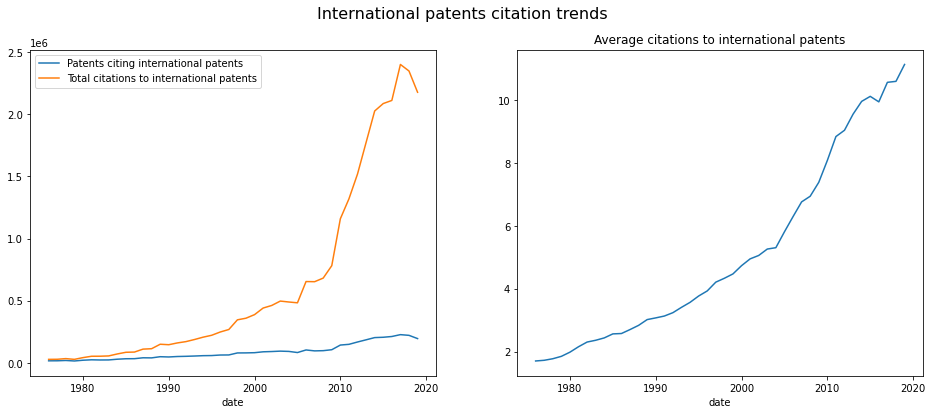

In [44]:
title="International patents citation trends"
fig = plt.figure(figsize=(16,6))
fig.suptitle(title, fontsize=16)

label="Patents citing international patents"
ax1 = fig.add_subplot(121)
df_pat.reset_index().groupby(['date', 'index']).size().reset_index().groupby('date').size().plot(ax=ax1, label=label, legend=True)

label='Total citations to international patents'
df_pat.groupby('date').size().plot(ax=ax1, label=label, legend=True)
ax1.legend()

title='Average citations to international patents'
ax2=fig.add_subplot(122)
ax2=df_pat.reset_index().groupby(['date', 'index']).count().reset_index().groupby('date').mean().uuid.plot()
ax2.set_title(title)

filename='img/international_patents_trends.png'
plt.savefig(filename) 
#plt.show()


In [15]:
#the patterns calls for further examination
df.groupby(['patent_id','year']).size()

patent_id  year  
10000000   2005.0    1
10000001   2002.0    1
           2005.0    1
           2009.0    1
           2013.0    1
                    ..
RE47643    2000.0    1
           2001.0    4
           2002.0    2
           2006.0    7
           2007.0    2
Length: 15417588, dtype: int64

In [16]:
#df=df.groupby('patent_id').count()['number']
#df=df.to_frame()
#df.columns = ['foreign_cit']

## Applications

In [ ]:
application='data/application.tsv.zip'
df=pd.read_csv(application, compression='zip', sep='\t')
df.head()

In [ ]:
df.country.value_counts()

In [ ]:
df=df[['patent_id','date']]

In [ ]:
df.head()

In [ ]:
dst='data/application.parquet.gz'
df = df.rename(columns={'date': 'application_date'})
#df.to_parquet(dst, compression='gzip', index=False)
df.memory_usage()

In [ ]:
max_value=[[]]
if not max_value:
    print('ok')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)